In [3]:
import pandas as pd
import openpyxl 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point
from geopandas.tools import sjoin


In [15]:


ini_df1 = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\raw_filtered_data_from_tirtha_sir.csv')
ini_df2 = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\combined_max_min_stations_info.csv')
ini_df3 = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\lubuche_filtered_df_up_to_2022.csv')





In [22]:

print("ini_df1")
# Renaming multiple columns at once
ini_df1 = ini_df1.drop(columns=['Unnamed: 0.1'])
ini_df1.rename(columns={
    'Date' : 'date',
    'Station': 'station',
    'Lat': 'lat',
    'Long': 'long', 
    "Elev": "elevation",
    'Max T': 'Tmax',
    'Min T': 'Tmin'
    
}, inplace=True)

print(ini_df1.head())

print("ini_df2")
ini_df2.rename(columns={
    'Date' : 'date',
    'Station': 'station',
    'Lat': 'lat',
    'Long': 'long', 
    "Elevation": "elevation",
    'Max T': 'Tmax',
    'Min T': 'Tmin'
    
}, inplace=True)
print(ini_df2.head())

print("ini_df3")
ini_df3.rename(columns={
    'Date' : 'date',
    'Station': 'station',
    'Lat': 'lat',
    'Long': 'long', 
    "Elevation": "elevation"
        
}, inplace=True)
print(ini_df3.head())




ini_df1
         date  station       lat      long  elevation  Tmax  Tmin
0  2014-04-01     1316  26.82044  87.15917        105  34.5  13.5
1  2014-04-02     1316  26.82044  87.15917        105  34.7  15.0
2  2014-04-03     1316  26.82044  87.15917        105  35.3  15.5
3  2014-04-04     1316  26.82044  87.15917        105  33.0  20.5
4  2014-04-05     1316  26.82044  87.15917        105  31.5  19.0
ini_df2
         date  station  Tmax  Tmin  elevation        lat       long
0  1962-01-01     1206  14.4   3.6     1731.0  27.308121  86.504225
1  1962-01-01     1405  14.8   1.3     1744.0  27.358611  87.670000
2  1962-01-02     1206  13.1   2.8     1731.0  27.308121  86.504225
3  1962-01-02     1405  12.8   2.4     1744.0  27.358611  87.670000
4  1962-01-03     1206  13.1   3.6     1731.0  27.308121  86.504225
ini_df3
         date      Tmax       Tmin  elevation  station        lat       long
0  1961-01-01 -0.484448 -14.044298       5200     9999  27.961111  86.808889
1  1961-01-02 -0.3

In [23]:
combined_koshi_df = pd.concat([ini_df1, ini_df2, ini_df3], ignore_index=True)

In [34]:
print(combined_koshi_df)

              date  station        lat       long  elevation       Tmax  \
0       2014-04-01     1316  26.820440  87.159170      105.0  34.500000   
1       2014-04-02     1316  26.820440  87.159170      105.0  34.700000   
2       2014-04-03     1316  26.820440  87.159170      105.0  35.300000   
3       2014-04-04     1316  26.820440  87.159170      105.0  33.000000   
4       2014-04-05     1316  26.820440  87.159170      105.0  31.500000   
...            ...      ...        ...        ...        ...        ...   
310330  2022-12-27     9999  27.961111  86.808889     5200.0   1.958502   
310331  2022-12-28     9999  27.961111  86.808889     5200.0   2.558002   
310332  2022-12-29     9999  27.961111  86.808889     5200.0   1.934952   
310333  2022-12-30     9999  27.961111  86.808889     5200.0   2.240752   
310334  2022-12-31     9999  27.961111  86.808889     5200.0   2.933752   

             Tmin  
0       13.500000  
1       15.000000  
2       15.500000  
3       20.500000  

In [25]:
unique_stations_4plot = combined_koshi_df[['station', 'lat', 'long', 'elevation']].drop_duplicates()
print(unique_stations_4plot)

        station        lat       long  elevation
0          1316  26.820440  87.159170      105.0
640        1201  27.816670  86.716670     3450.0
6253       1401  27.683330  87.783330     3119.0
9654       1225  27.816670  86.716670     3700.0
11916      1218  27.833330  86.766670     3857.0
15084      1206  27.308121  86.504225     1731.0
15085      1405  27.358611  87.670000     1744.0
17878      1103  27.630447  86.232114     1877.0
30137      1027        NaN        NaN        NaN
30138      1036  27.645134  85.620881      857.0
36012      1016  27.944561  85.595136     2574.0
36016      1123  27.394703  86.061233      497.0
36017      1124  27.633333  86.133333     1755.0
36019      1212  26.730538  86.934812      101.0
36020      1219  27.505118  86.586215     2383.0
36021      1222  27.212522  86.791886     1612.0
36022      1304  27.046316  87.292473     1720.0
36023      1327  27.391062  87.204384     1064.0
61332      1303  27.292097  87.316966     1277.0
61334      1307  26.

In [26]:
shapefile_path = r'G:\fresh_start\paper\code_paper\arcgis\koshibasin\physiographic_koshi\koshi_5_physiographic.shp'
gdf_basin = gpd.read_file(shapefile_path)

In [27]:
koshi_stations_gdf = gpd.GeoDataFrame(unique_stations_4plot, 
                       geometry=gpd.points_from_xy(unique_stations_4plot['long'], unique_stations_4plot['lat']),
                       crs="EPSG:4326")  # WGS84 Latitude/Longitude

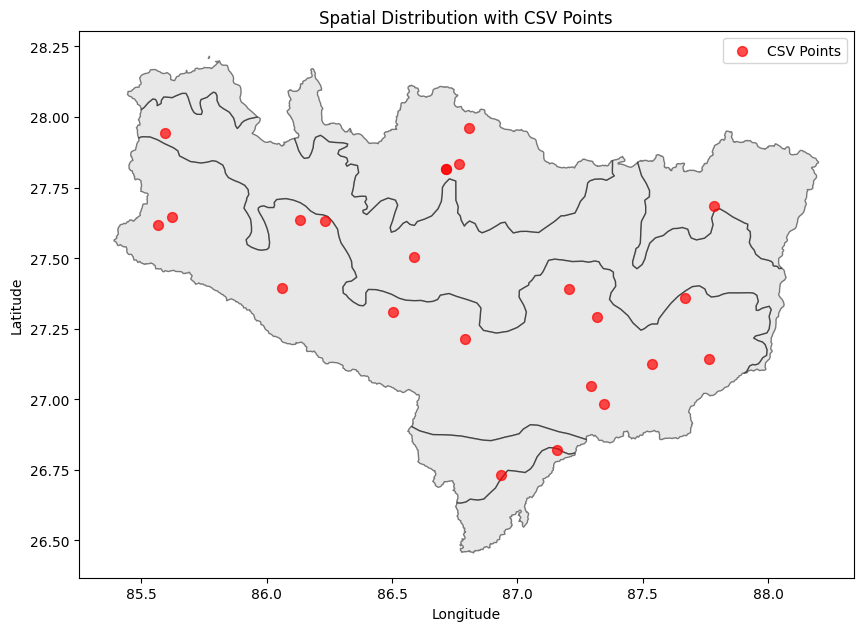

In [28]:
koshi_stations_gdf.crs = gdf_basin.crs
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the gdf_basin
gdf_basin.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.5)

# Plot the points from the CSV
koshi_stations_gdf.plot(ax=ax, color='red', markersize=50, label='CSV Points', alpha=0.7)

# Add legend and titles
plt.legend()
plt.title('Spatial Distribution with CSV Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

In [33]:
# Perform spatial join
points_within_basin = sjoin(koshi_stations_gdf, gdf_basin, predicate='within')
#print(points_within_basin.head())
all_stations_info_koshi = points_within_basin[['station', 'lat', 'long', 'elevation', 'DESCRIPTIO' ]]

all_stations_info_koshi.rename(columns={'DESCRIPTIO': 'regions'}, inplace=True)

print(all_stations_info_koshi)


        station        lat       long  elevation          regions
0          1316  26.820440  87.159170      105.0            Tarai
640        1201  27.816670  86.716670     3450.0    High Mountain
6253       1401  27.683330  87.783330     3119.0    High Mountain
9654       1225  27.816670  86.716670     3700.0    High Mountain
11916      1218  27.833330  86.766670     3857.0    High Mountain
15084      1206  27.308121  86.504225     1731.0             Hill
15085      1405  27.358611  87.670000     1744.0             Hill
17878      1103  27.630447  86.232114     1877.0             Hill
30138      1036  27.645134  85.620881      857.0             Hill
36012      1016  27.944561  85.595136     2574.0  Middle Mountain
36016      1123  27.394703  86.061233      497.0             Hill
36017      1124  27.633333  86.133333     1755.0             Hill
36019      1212  26.730538  86.934812      101.0          Siwalik
36020      1219  27.505118  86.586215     2383.0  Middle Mountain
36021     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9984\1167087501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stations_info_koshi.rename(columns={'DESCRIPTIO': 'regions'}, inplace=True)


In [36]:
# Merge the main dataframe with the station regions dataframe on the station column
df11_merged = pd.merge(combined_koshi_df, all_stations_info_koshi[['station', 'regions']], on='station', how='inner')

# Now `df_merged` contains the filtered data with the added regions column
print(df11_merged)

              date  station        lat       long  elevation       Tmax  \
0       2014-04-01     1316  26.820440  87.159170      105.0  34.500000   
1       2014-04-02     1316  26.820440  87.159170      105.0  34.700000   
2       2014-04-03     1316  26.820440  87.159170      105.0  35.300000   
3       2014-04-04     1316  26.820440  87.159170      105.0  33.000000   
4       2014-04-05     1316  26.820440  87.159170      105.0  31.500000   
...            ...      ...        ...        ...        ...        ...   
297697  2022-12-27     9999  27.961111  86.808889     5200.0   1.958502   
297698  2022-12-28     9999  27.961111  86.808889     5200.0   2.558002   
297699  2022-12-29     9999  27.961111  86.808889     5200.0   1.934952   
297700  2022-12-30     9999  27.961111  86.808889     5200.0   2.240752   
297701  2022-12-31     9999  27.961111  86.808889     5200.0   2.933752   

             Tmin        regions  
0       13.500000          Tarai  
1       15.000000          Ta

In [37]:
#df11_merged.to_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\raw_final_to_be_filled.csv', index=False)

In [4]:
df11_merged = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\raw_final_to_be_filled.csv')

In [5]:
# Initialize dictionaries to hold cleaned data for Tmax and Tmin
tmax_outlier_check_dict = {}
tmin_outlier_check_dict = {}

# Get unique stations
stations = df11_merged['station'].unique()

# Iterate over each station and perform IQR filtering for Tmax and Tmin
for station in stations:
    # Filter data for the current station
    station_data = df11_merged[df11_merged['station'] == station]

    # Define a function to calculate and filter based on IQR for a given column
    def filter_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Apply the IQR filter to Tmax and Tmin and store in respective dictionaries
    tmax_outlier_check_dict[station] = filter_outliers(station_data, 'Tmax')
    tmin_outlier_check_dict[station] = filter_outliers(station_data, 'Tmin')


In [6]:
print(tmin_outlier_check_dict)

{np.int64(1316):            date  station       lat      long  elevation  Tmax  Tmin regions
0    2014-04-01     1316  26.82044  87.15917      105.0  34.5  13.5   Tarai
1    2014-04-02     1316  26.82044  87.15917      105.0  34.7  15.0   Tarai
2    2014-04-03     1316  26.82044  87.15917      105.0  35.3  15.5   Tarai
3    2014-04-04     1316  26.82044  87.15917      105.0  33.0  20.5   Tarai
4    2014-04-05     1316  26.82044  87.15917      105.0  31.5  19.0   Tarai
..          ...      ...       ...       ...        ...   ...   ...     ...
635  2015-12-27     1316  26.82044  87.15917      105.0  25.8   8.4   Tarai
636  2015-12-28     1316  26.82044  87.15917      105.0  25.5  10.0   Tarai
637  2015-12-29     1316  26.82044  87.15917      105.0  27.4   9.0   Tarai
638  2015-12-30     1316  26.82044  87.15917      105.0  26.5   9.5   Tarai
639  2015-12-31     1316  26.82044  87.15917      105.0  27.0  10.4   Tarai

[640 rows x 8 columns], np.int64(1201):             date  station     

In [7]:
print(tmax_outlier_check_dict)

{np.int64(1316):            date  station       lat      long  elevation  Tmax  Tmin regions
0    2014-04-01     1316  26.82044  87.15917      105.0  34.5  13.5   Tarai
1    2014-04-02     1316  26.82044  87.15917      105.0  34.7  15.0   Tarai
2    2014-04-03     1316  26.82044  87.15917      105.0  35.3  15.5   Tarai
3    2014-04-04     1316  26.82044  87.15917      105.0  33.0  20.5   Tarai
4    2014-04-05     1316  26.82044  87.15917      105.0  31.5  19.0   Tarai
..          ...      ...       ...       ...        ...   ...   ...     ...
635  2015-12-27     1316  26.82044  87.15917      105.0  25.8   8.4   Tarai
636  2015-12-28     1316  26.82044  87.15917      105.0  25.5  10.0   Tarai
637  2015-12-29     1316  26.82044  87.15917      105.0  27.4   9.0   Tarai
638  2015-12-30     1316  26.82044  87.15917      105.0  26.5   9.5   Tarai
639  2015-12-31     1316  26.82044  87.15917      105.0  27.0  10.4   Tarai

[629 rows x 8 columns], np.int64(1201):             date  station     

In [8]:
# Concatenate all DataFrames in the dictionary into a single DataFrame
tmax_combined_df = pd.concat(tmax_outlier_check_dict.values(), ignore_index=True)
tmin_combined_df = pd.concat(tmin_outlier_check_dict.values(), ignore_index=True)
# Display the combined DataFrame
print(tmin_combined_df)


              date  station        lat       long  elevation       Tmax  \
0       2014-04-01     1316  26.820440  87.159170      105.0  34.500000   
1       2014-04-02     1316  26.820440  87.159170      105.0  34.700000   
2       2014-04-03     1316  26.820440  87.159170      105.0  35.300000   
3       2014-04-04     1316  26.820440  87.159170      105.0  33.000000   
4       2014-04-05     1316  26.820440  87.159170      105.0  31.500000   
...            ...      ...        ...        ...        ...        ...   
229595  2022-12-27     9999  27.961111  86.808889     5200.0   1.958502   
229596  2022-12-28     9999  27.961111  86.808889     5200.0   2.558002   
229597  2022-12-29     9999  27.961111  86.808889     5200.0   1.934952   
229598  2022-12-30     9999  27.961111  86.808889     5200.0   2.240752   
229599  2022-12-31     9999  27.961111  86.808889     5200.0   2.933752   

             Tmin        regions  
0       13.500000          Tarai  
1       15.000000          Ta

In [9]:
print(tmax_combined_df)

              date  station        lat       long  elevation       Tmax  \
0       2014-04-01     1316  26.820440  87.159170      105.0  34.500000   
1       2014-04-02     1316  26.820440  87.159170      105.0  34.700000   
2       2014-04-03     1316  26.820440  87.159170      105.0  35.300000   
3       2014-04-04     1316  26.820440  87.159170      105.0  33.000000   
4       2014-04-05     1316  26.820440  87.159170      105.0  31.500000   
...            ...      ...        ...        ...        ...        ...   
215987  2022-12-27     9999  27.961111  86.808889     5200.0   1.958502   
215988  2022-12-28     9999  27.961111  86.808889     5200.0   2.558002   
215989  2022-12-29     9999  27.961111  86.808889     5200.0   1.934952   
215990  2022-12-30     9999  27.961111  86.808889     5200.0   2.240752   
215991  2022-12-31     9999  27.961111  86.808889     5200.0   2.933752   

             Tmin        regions  
0       13.500000          Tarai  
1       15.000000          Ta

In [10]:
# Select specific columns for the new DataFrame
new_df22 = tmin_combined_df[['date', 'regions', 'station', 'lat', 'long', 'elevation', 'Tmin']]
# Perform a merge on 'date' and 'station' to add the Tmax column from tmax_combined_df to new_df
merged_df22 = pd.merge(new_df22, tmax_combined_df[['date', 'regions', 'station', 'Tmax']], on=['date', 'regions', 'station'], how='left')

# Display the updated DataFrame
print(merged_df22)

              date        regions  station        lat       long  elevation  \
0       2014-04-01          Tarai     1316  26.820440  87.159170      105.0   
1       2014-04-02          Tarai     1316  26.820440  87.159170      105.0   
2       2014-04-03          Tarai     1316  26.820440  87.159170      105.0   
3       2014-04-04          Tarai     1316  26.820440  87.159170      105.0   
4       2014-04-05          Tarai     1316  26.820440  87.159170      105.0   
...            ...            ...      ...        ...        ...        ...   
229666  2022-12-27  High Mountain     9999  27.961111  86.808889     5200.0   
229667  2022-12-28  High Mountain     9999  27.961111  86.808889     5200.0   
229668  2022-12-29  High Mountain     9999  27.961111  86.808889     5200.0   
229669  2022-12-30  High Mountain     9999  27.961111  86.808889     5200.0   
229670  2022-12-31  High Mountain     9999  27.961111  86.808889     5200.0   

             Tmin       Tmax  
0       13.500000  3

In [11]:
def generate_dummy_temp_data(station, regions, lat, long, elevation):
    # Create an empty list to store the data
    data = []

    # Generate random temperature data for each day within the date range
    current_date = date(1962, 1, 1)
    while current_date <= date(2022, 12, 31):
        Tmin = round(random.uniform(-300, -500), 1)  # Generating Tmin in a reasonable range
        Tmax = round(random.uniform(300, 500), 1)  # Generating Tmax in a reasonable range
        data.append([current_date, station_code, regions, lat, long, elevation, Tmin, Tmax])
        current_date += timedelta(days=1)

    # Create a DataFrame from the generated data
    dummy_temp_df = pd.DataFrame(data, columns=['date', 'station', 'regions', 'lat', 'long', 'elevation', 'Tmin', 'Tmax'])

    return dummy_temp_df

In [12]:
import pandas as pd
import random
from datetime import date, timedelta

def generate_dummy_temp_data(station_code, regions, lat, long, elevation):
    # Create an empty list to store the data
    data = []

    # Generate random temperature data for each day within the date range
    current_date = date(1962, 1, 1)
    while current_date <= date(2022, 12, 31):
        Tmin = round(random.uniform(-300, -500), 1)  # Generating Tmin in a reasonable range
        Tmax = round(random.uniform(300, 500), 1)  # Generating Tmax in a reasonable range
        data.append([current_date, station_code, regions, lat, long, elevation, Tmin, Tmax])
        current_date += timedelta(days=1)

    # Create a DataFrame from the generated data
    dummy_temp_df = pd.DataFrame(data, columns=['date',  'station', 'regions', 'lat', 'long', 'elevation', 'Tmin', 'Tmax'])

    return dummy_temp_df

# Create an empty list to store all station data
all_station_data = []

# Iterate over unique stations and generate dummy data
for station_code in merged_df22['station'].unique():
    # Filter metadata for the current station
    station_data = merged_df22[merged_df22['station'] == station_code].drop_duplicates()
    
    # Ensure there's only one row of metadata for each station
    if not station_data.empty:
        lat = station_data['lat'].values[0]
        long = station_data['long'].values[0]
        elevation = station_data['elevation'].values[0]
        regions = station_data['regions'].values[0]

        # Generate dummy temperature data for the current station
        dummy_data = generate_dummy_temp_data(
            regions=regions,
            station_code=station_code,
            
            lat=lat,
            long=long,
            elevation=elevation
        )
        all_station_data.append(dummy_data)

# Concatenate all station data into a single DataFrame
combined_dummy_df4444 = pd.concat(all_station_data, ignore_index=True)

# View the resulting DataFrame
print(combined_dummy_df4444)


              date  station        regions        lat       long  elevation  \
0       1962-01-01     1316          Tarai  26.820440  87.159170      105.0   
1       1962-01-02     1316          Tarai  26.820440  87.159170      105.0   
2       1962-01-03     1316          Tarai  26.820440  87.159170      105.0   
3       1962-01-04     1316          Tarai  26.820440  87.159170      105.0   
4       1962-01-05     1316          Tarai  26.820440  87.159170      105.0   
...            ...      ...            ...        ...        ...        ...   
512435  2022-12-27     9999  High Mountain  27.961111  86.808889     5200.0   
512436  2022-12-28     9999  High Mountain  27.961111  86.808889     5200.0   
512437  2022-12-29     9999  High Mountain  27.961111  86.808889     5200.0   
512438  2022-12-30     9999  High Mountain  27.961111  86.808889     5200.0   
512439  2022-12-31     9999  High Mountain  27.961111  86.808889     5200.0   

         Tmin   Tmax  
0      -461.5  324.1  
1    

In [21]:
combined_dummy_df4444['date'] = pd.to_datetime(combined_dummy_df4444['date'])
merged_df22['date'] = pd.to_datetime(merged_df22['date'])
df33333333 = pd.merge(combined_dummy_df4444, merged_df22, on=['date','station', 'regions', 'elevation', 'lat', 'long'], how='left').fillna(np.nan)

In [25]:
df333333334444 = df33333333.copy()

In [28]:
print(df333333334444.columns)

Index(['date', 'station', 'regions', 'lat', 'long', 'elevation', 'Tmin_x',
       'Tmax_x', 'Tmin_y', 'Tmax_y'],
      dtype='object')


In [30]:
df333333334444 = df333333334444.drop(columns=['Tmin_x', 'Tmax_x'])
df333333334444 = df333333334444.rename(columns={'Tmin_y': 'Tmin', 'Tmax_y': 'Tmax'})


In [32]:
df333333334444.to_csv(r"G:\fresh_start\paper\code_paper\main_data\raw_data\df33333333_Nan.csv", index=False)

In [31]:
print(df333333334444)

             date  station        regions        lat       long  elevation  \
0      1962-01-01     1316          Tarai  26.820440  87.159170      105.0   
1      1962-01-02     1316          Tarai  26.820440  87.159170      105.0   
2      1962-01-03     1316          Tarai  26.820440  87.159170      105.0   
3      1962-01-04     1316          Tarai  26.820440  87.159170      105.0   
4      1962-01-05     1316          Tarai  26.820440  87.159170      105.0   
...           ...      ...            ...        ...        ...        ...   
512534 2022-12-27     9999  High Mountain  27.961111  86.808889     5200.0   
512535 2022-12-28     9999  High Mountain  27.961111  86.808889     5200.0   
512536 2022-12-29     9999  High Mountain  27.961111  86.808889     5200.0   
512537 2022-12-30     9999  High Mountain  27.961111  86.808889     5200.0   
512538 2022-12-31     9999  High Mountain  27.961111  86.808889     5200.0   

             Tmin      Tmax  
0             NaN       NaN  
1  

In [33]:
import pandas as pd
def calculate_temp(row, temp_column, df):
    if pd.isna(row[temp_column]):  # If the Tmin is NaN
        # Find all rows with the same date
        same_date_data = df[df['Date'] == row['Date']]
        
        # Iterate over all rows with the same date
        for _, obs_row in same_date_data.iterrows():
            # If there is a valid Tmin and it's from a different station
            if not pd.isna(obs_row[temp_column]) and obs_row['Station'] != row['Station']:
                # Calculate the adjusted temperature using the lapse rate
                lapse_rate = -6.5 / 1000  # Lapse rate in °C per meter
                return obs_row[temp_column] + (row['Elevation'] - obs_row['Elevation']) * lapse_rate
    
    # If Tmin is not NaN, return the original Tmin
    return row[temp_column]

data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-01', 
             '2023-01-02', '2023-01-02', '2023-01-02',
             '2023-01-03', '2023-01-03', '2023-01-03'],
    'Station': [101, 102, 103, 
                101, 102, 103, 
                101, 102, 103],
    'Elevation': [100, 200, 150, 
                  100, 300, 250,
                  100, 200, 150],
    'Tmin': [15.0, None, 12.0, 
             None, 11.0, None,
             13.5, None, None]
}

df = pd.DataFrame(data)
df['Tmin'] = df.apply(lambda row: calculate_temp(row, 'Tmin', df), axis=1)
print(df)



         Date  Station  Elevation    Tmin
0  2023-01-01      101        100  15.000
1  2023-01-01      102        200  14.350
2  2023-01-01      103        150  12.000
3  2023-01-02      101        100  12.300
4  2023-01-02      102        300  11.000
5  2023-01-02      103        250  11.325
6  2023-01-03      101        100  13.500
7  2023-01-03      102        200  12.850
8  2023-01-03      103        150  13.175


In [34]:
avg_elevation_diff = 600 - 1200

In [35]:
print(avg_elevation_diff)

-600


In [39]:
def calculate_temp(row, temp_column, df):
    # If the temperature is missing
    if pd.isna(row[temp_column]):
        # Get all rows with the same date
        same_date_data = df[df['Date'] == row['Date']]
        print("same_date_data")
        print(same_date_data)
        
        # Iterate through rows with the same date
        for _, obs_row in same_date_data.iterrows():
            # Check for valid temperature and different station
            if not pd.isna(obs_row[temp_column]) and obs_row['Station'] != row['Station']:
                lapse_rate = -6.5 / 1000  # Lapse rate in °C per meter
              
                print("obs_row temp_column")

                print(obs_row[temp_column])

                print("elev diff gradient")

                print((row['Elevation'] - obs_row['Elevation']) * lapse_rate)


                # Calculate and return the adjusted temperature
                
                return obs_row[temp_column] + (row['Elevation'] - obs_row['Elevation']) * lapse_rate
    
    # Return the original temperature if it's not missing
    return row[temp_column]

data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-01', 
             '2023-01-02', '2023-01-02', '2023-01-02',
             '2023-01-03', '2023-01-03', '2023-01-03'],
    'Station': [101, 102, 103, 
                101, 102, 103, 
                101, 102, 103],
    'Elevation': [1000, 200, 150, 
                  100, 300, 2500,
                  100, 200, 150],
    'Tmin': [15.0, None, 12.0, 
             None, 11.0, None,
             13.5, None, None]
}

df = pd.DataFrame(data)
df['Tmin'] = df.apply(lambda row: calculate_temp(row, 'Tmin', df), axis=1)
print(df)


same_date_data
         Date  Station  Elevation  Tmin
0  2023-01-01      101       1000  15.0
1  2023-01-01      102        200   NaN
2  2023-01-01      103        150  12.0
obs_row temp_column
15.0
elev diff gradient
5.2
same_date_data
         Date  Station  Elevation  Tmin
3  2023-01-02      101        100   NaN
4  2023-01-02      102        300  11.0
5  2023-01-02      103       2500   NaN
obs_row temp_column
11.0
elev diff gradient
1.3
same_date_data
         Date  Station  Elevation  Tmin
3  2023-01-02      101        100   NaN
4  2023-01-02      102        300  11.0
5  2023-01-02      103       2500   NaN
obs_row temp_column
11.0
elev diff gradient
-14.299999999999999
same_date_data
         Date  Station  Elevation  Tmin
6  2023-01-03      101        100  13.5
7  2023-01-03      102        200   NaN
8  2023-01-03      103        150   NaN
obs_row temp_column
13.5
elev diff gradient
-0.65
same_date_data
         Date  Station  Elevation  Tmin
6  2023-01-03      101        100  